In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
import inspect
import seaborn as sns 

base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
data_dir = os.path.join(base, 'neural-straight/data/')
if data_dir not in sys.path:
    sys.path.append(data_dir)
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
from data.datasets import MovieSet
from utils.utils import create_gif, get_trial_idx, butter_temporal_filter
from utils.curvature import compute_curvature
#from sklearn.decomposition import PCA
#from scipy import signal
from visualization.visualize import vis_pca_trajectory, view_frames

### Exploring temporal filtering

In [3]:
file = '{}movies16314-4-3-pre3-pipe1-seg3-spike5.h5'.format(data_dir)
dataset = MovieSet(file, 'inputs', 'behavior', 'eye_position', 'responses')
dataset

MovieSet m=1620:
	(inputs, behavior, eye_position, responses)
	[Transforms: ]

In [537]:
file = '{}movies21067-8-9-pre0-pipe1-seg6-spike5.h5'.format(data_dir)
dataset = MovieSet(file, 'inputs', 'behavior', 'eye_position', 'responses')
dataset

MovieSet m=718:
	(inputs, behavior, eye_position, responses)
	[Transforms: ]

In [69]:
ind = 70
x = dataset[ind].inputs[0,]
y = dataset[ind].responses

In [70]:
xf = butter_temporal_filter(x, 3, 30, 2)
yf = butter_temporal_filter(y, 3, 30, 2)

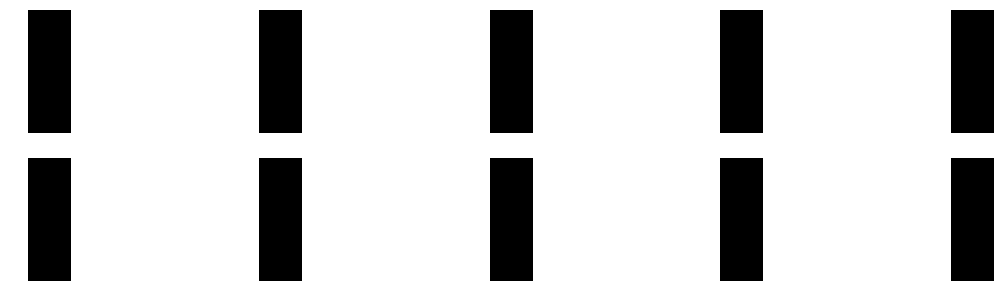

In [71]:
view_frames(x[:,:,:25]);

In [72]:
create_gif(x[:,:,:25], 'temp_vis/v5_patch.gif', 30)

In [78]:
ind = 70
x = dataset[ind].inputs[0,]
y = dataset[ind].responses

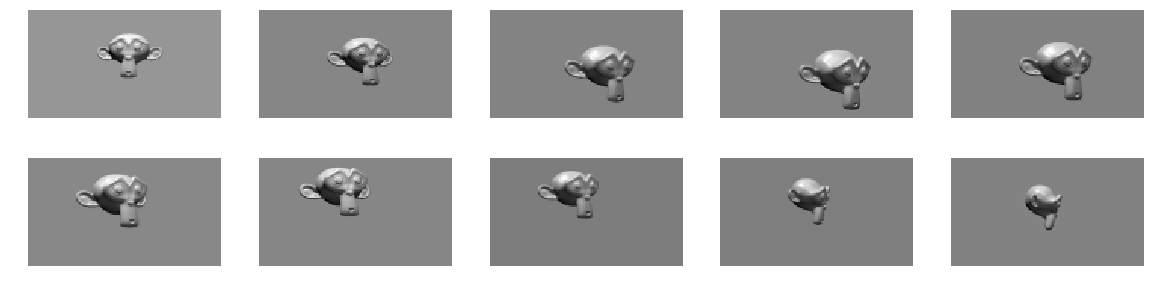

In [79]:
view_frames(x[:,:,:]);

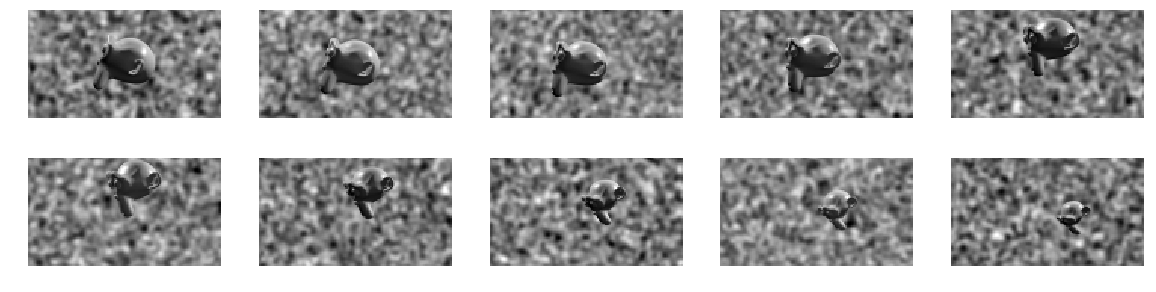

In [82]:
x = dataset[0].inputs[0,]
view_frames(x[:,:,:])

In [93]:
step = 128
x1 = dataset[0].inputs[0,]
x2 = dataset[70].inputs[0,]

x1 = x1[:,:,:step]
x2 = x2[:,:,:step]

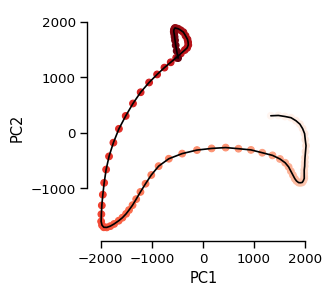

In [95]:
vis_pca_trajectory(x1);

In [88]:
c1 = compute_curvature(x1).mean()
c2 = compute_curvature(x2).mean()
print('Curvature type1: {:.3f}, Curvature type3: {:.3f}'.format(c2, c1))

Curvature type1: 73.923, Curvature type3: 45.161


In [74]:
print(x1.shape, x2.shape)
(compute_curvature(x1).mean(), compute_curvature(x2).mean())

(91, 72, 25) (91, 72, 25)


/gpfs01/bethge/home/scadena/Documents/research/neural-straight/nstraight/utils/curvature.py:21: RuntimeWarning: invalid value encountered in true_divide
  return np.array([a / norm(a.flatten()) for a in x])


(26.747028, 0.0)

In [43]:
indsv1 = dataset.neurons.area =='LM'

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


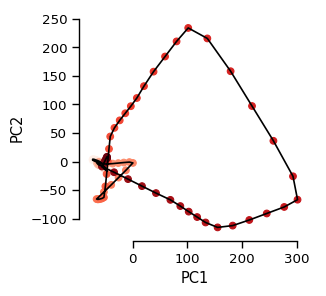

In [1006]:
fig,_ = vis_pca_trajectory(y[:,indsv1]);
fig.savefig('temp_vis/original_trajectory_pca.png', bbox_inches = 'tight')

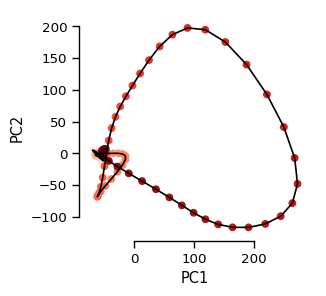

In [1007]:
fig,_ = vis_pca_trajectory(yf[:, indsv1]);
fig.savefig('temp_vis/filtered_trajectory_pca.png', bbox_inches = 'tight')

In [553]:
print(xf.shape, compute_curvature(xf).mean())

(301, 36, 64) 22.83109308477637


In [541]:
print(xf.shape, compute_curvature(xf).mean())

(301, 36, 64) 22.83109308477637


In [542]:
print(x.shape, compute_curvature(x).mean())

(301, 36, 64) 69.83241


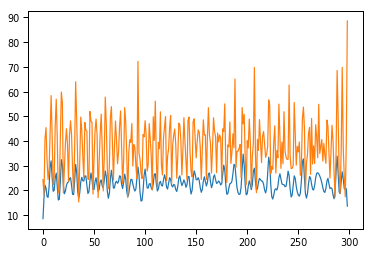

In [578]:
plt.plot(compute_curvature(yf))
plt.plot(compute_curvature(y))

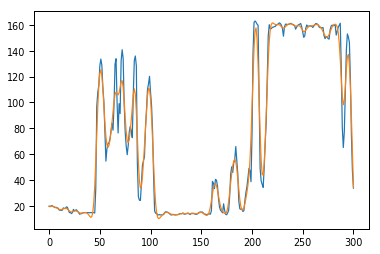

In [566]:
plt.plot(x[:, 15, 30])
plt.plot(xf[:, 15, 30])

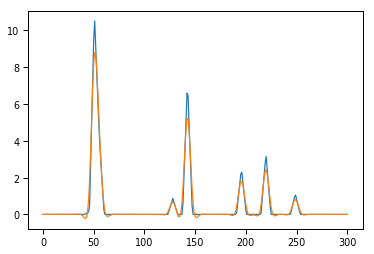

In [577]:
plt.plot(y[:,433])
plt.plot(yf[:, 433])

In [600]:
neurons = y.shape[1]
inds = np.random.choice(neurons, size=300)
ysub = y[:,inds]

yfsub = butter_temporal_filter(ysub, 3, 30, 2)

In [601]:
c_ysub = compute_curvature(ysub)
c_yfsub = compute_curvature(yfsub)

In [602]:
c_ysub.mean()

35.613632

In [603]:
c_yfsub.mean()

22.680360689518743

In [604]:
compute_curvature(yf).mean()

22.878882409517594

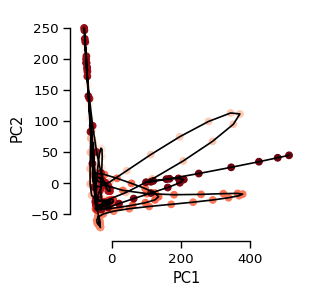

In [606]:
fig, xr = vis_pca_trajectory(yfsub);

In [ ]:
compute_curvature

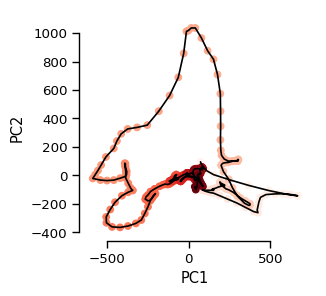

In [590]:
fig, xr = vis_pca_trajectory(y);

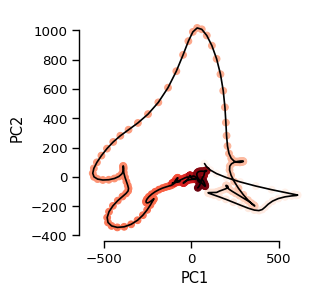

In [591]:
fig, xr = vis_pca_trajectory(yf);

In [549]:
compute_curvature(x).std()

10.686163

In [536]:
#dataset.condition_hashes

In [533]:
create_gif(x, 'temp_vis/finalrun_708.gif', 30)

In [515]:
#dataset.condition_hashes

In [350]:
from skimage.transform import rescale


In [484]:
x = dataset[70].inputs[0]

In [485]:
print(x.shape, compute_curvature(x).mean())

scale = 0.5
x = rescale(x, [1, scale, scale], mode='reflect', multichannel=False, anti_aliasing=False, preserve_range=True)

print(x.shape, compute_curvature(x).mean())

(91, 72, 128) 73.92302
(91, 36, 64) 59.780514


In [490]:
xf = butter_temporal_filter(x, 3, 30, 2)

In [491]:
print(xf.shape, compute_curvature(xf).mean())

(91, 36, 64) 22.729914020274702


In [492]:
xf = xf[:,::2,::2]

# scale = 0.5
# xf = rescale(xf, [1, scale, scale], mode='reflect', multichannel=False, anti_aliasing=False, preserve_range=True)
 
print(xf.shape, compute_curvature(xf).mean())

(91, 18, 32) 22.437207677576655


In [404]:
x = dataset[56].inputs[0]
print(x.shape, compute_curvature(x).mean())

#x = x[:,::2,::2]


scale = 4
x = rescale(x, [1, scale, scale], mode='reflect', multichannel=False, anti_aliasing=False, preserve_range=True)
print(x.shape, compute_curvature(x).mean())

(91, 72, 128) 48.81656
(91, 288, 512) 39.89317


In [405]:
#create_gif(xf, '../notebooks/temp_vis/downsampled_movie.gif',6)

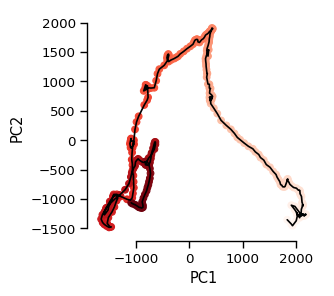

In [641]:
fig, xr = vis_pca_trajectory(x);

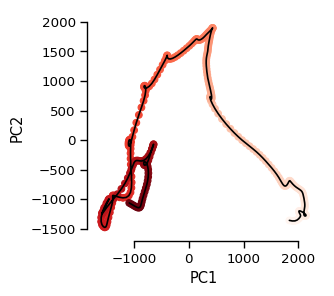

In [642]:
fig2, xrf = vis_pca_trajectory(xf);

In [ ]:
fig, ax

In [886]:
ind = 122
step = 5

Original curvature: 68.401, Filtered curvature: 21.885, Filtered subsampled: 81.992


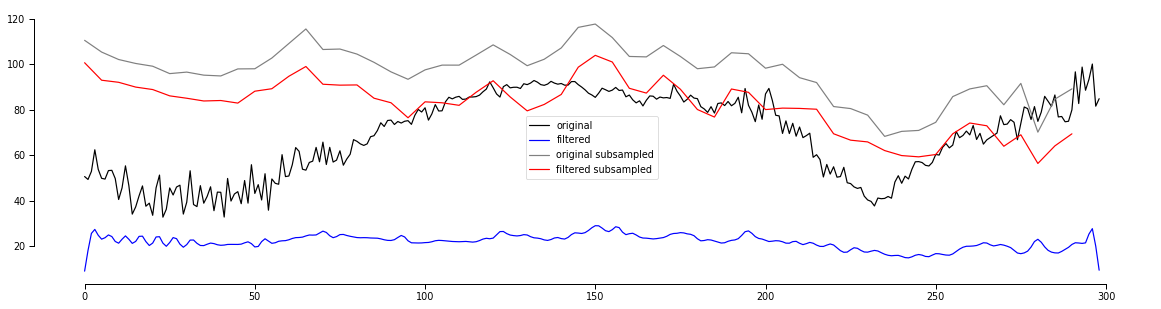

In [955]:
#ind = 566
x = dataset[ind].inputs[0,]
y = dataset[ind].responses

sns.set_context('paper', font_scale=1.1)
fig, ax = plt.subplots(1,1,figsize = (20,5))

cx  = compute_curvature(x)
cxs = compute_curvature(x[::step])

xf = butter_temporal_filter(x, 3, 30, 2)
cxf = compute_curvature(xf)

cxfs = compute_curvature(xf[::step, ])

print('Original curvature: {:.3f}, Filtered curvature: {:.3f}, Filtered subsampled: {:.3f}'.format(cx.mean(), cxf.mean(), cxfs.mean()))

with sns.axes_style("ticks"):
    ax.plot(cx, 'k', label = 'original')
    ax.plot(cxf, 'b', label = 'filtered')
    ax.plot(np.arange(0,298-step+1, step), cxs, 'gray', label = 'original subsampled')
    ax.plot(np.arange(0,298-step+1, step), cxfs, 'r', label = 'filtered subsampled')
sns.despine(trim=True)
plt.legend()

Original curvature: 37.472, Filtered curvature: 22.347, Filtered subsampled: 92.810


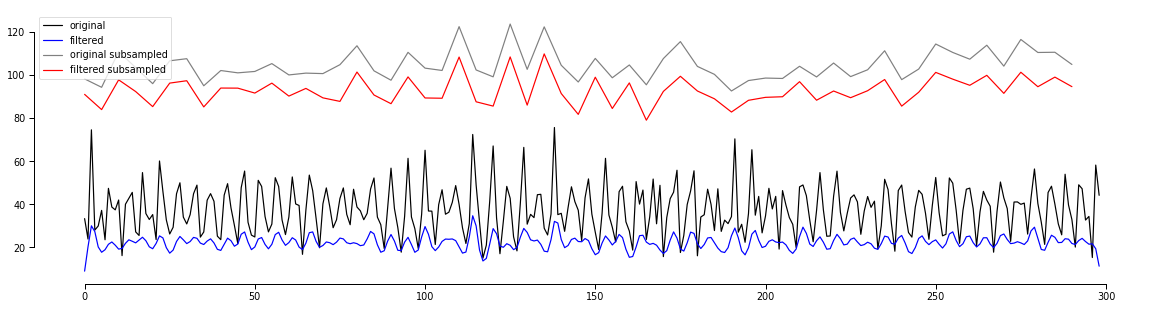

In [888]:
#ind = 566
x = dataset[ind].inputs[0,]
y = dataset[ind].responses

x = y.copy()
sns.set_context('paper', font_scale=1.1)
fig, ax = plt.subplots(1,1,figsize = (20,5))

cx  = compute_curvature(x)
cxs = compute_curvature(x[::step,])

xf = butter_temporal_filter(x, 3, 30, 2)
cxf = compute_curvature(xf)

cxfs = compute_curvature(xf[::step, ])

print('Original curvature: {:.3f}, Filtered curvature: {:.3f}, Filtered subsampled: {:.3f}'.format(cx.mean(), cxf.mean(), cxfs.mean()))

with sns.axes_style("ticks"):
    ax.plot(cx, 'k', label = 'original')
    ax.plot(cxf, 'b', label = 'filtered')
    ax.plot(np.arange(0,298-step+1, step), cxs, 'gray', label = 'original subsampled')
    ax.plot(np.arange(0,298-step+1, step), cxfs, 'r', label = 'filtered subsampled')
sns.despine(trim=True)
plt.legend()

In [986]:
ind = 22
x = dataset[ind].inputs[0,]
xf = butter_temporal_filter(x, 3, 30, 2)

In [987]:
from visualization.visualize import view_frames

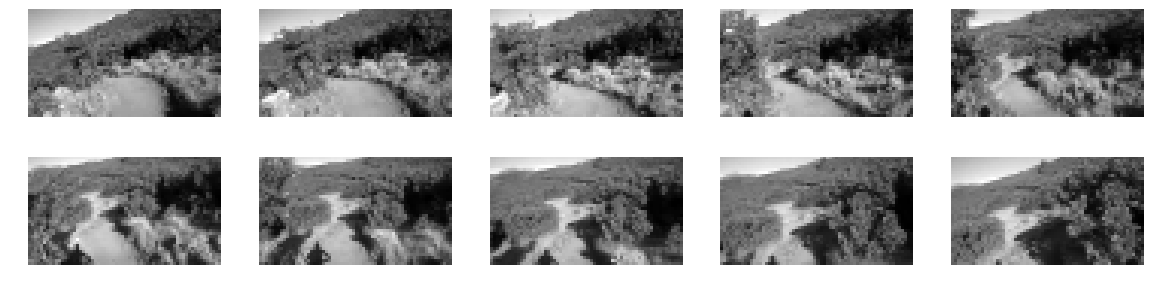

In [988]:
view_frames(x)

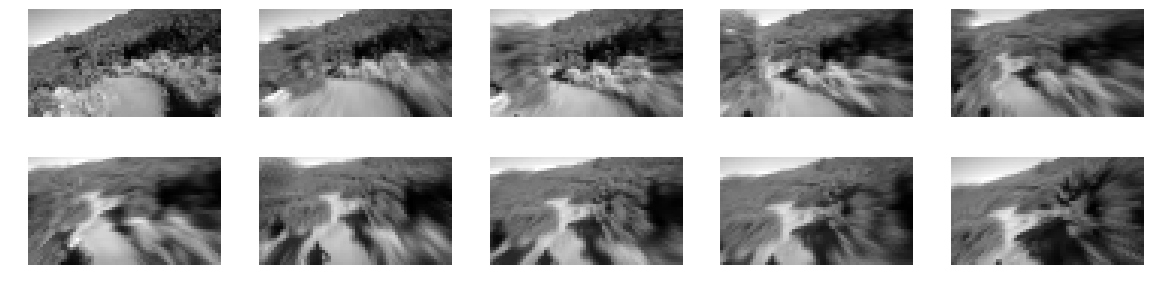

In [989]:
view_frames(xf)

In [948]:
import numpy.fft as fft
spectrum = fft.fft(cx)

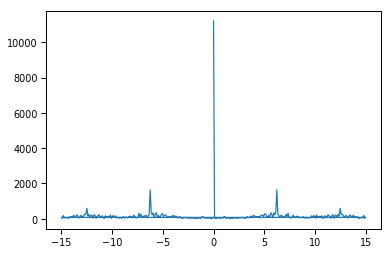

In [949]:
freq = fft.fftfreq(len(spectrum))
plt.plot(freq * 30, abs(spectrum))

In [952]:
threshold = 0.2 * max(abs(spectrum[1:]))
mask = abs(spectrum) > threshold
peaks = freq[mask]

In [953]:
peaks *30

array([  0.        ,   5.6187291 ,   5.91973244,   6.12040134,
         6.22073579,  12.44147157, -12.44147157,  -6.22073579,
        -6.12040134,  -5.91973244,  -5.6187291 ])

In [804]:
cxs = compute_curvature(x[::5,])

In [805]:
cxs.mean()

101.99495

In [648]:
x[::5,].shape

(61, 36, 64)

In [802]:
xf = butter_temporal_filter(x, 3, 30, 2)
xfs = xf[::5,]
cx = compute_curvature(x)
cxf = compute_curvature(xf)
cxfs = compute_curvature(xfs)

print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(cx.mean(), cxf.mean(), cxfs.mean()))
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(np.median(cx), np.median(cxf), np.median(cxfs)))

Original: 69.832, Filtered: 22.831, Subsampled Curvature: 87.980
Original: 69.175, Filtered: 21.909, Subsampled Curvature: 85.956


In [660]:
create_gif(xfs, 'temp_vis/nat_movie_filtered_subsampled.gif', 6)

/usr/local/lib/python3.6/dist-packages/array2gif/core.py:108: UserWarning: 
Your image was cast to a `uint8` (`<img>.astype(uint8)`), but some information was lost.
Please check your gif and convert to uint8 beforehand if the gif looks wrong.
  warnings.warn(message)


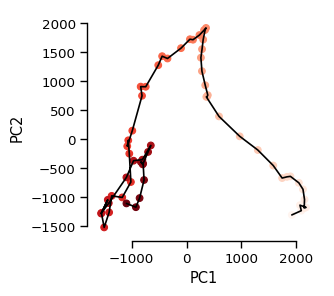

In [662]:
vis_pca_trajectory(xfs);

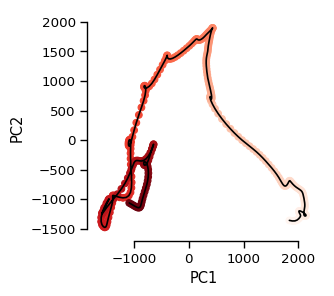

In [664]:
vis_pca_trajectory(xf);

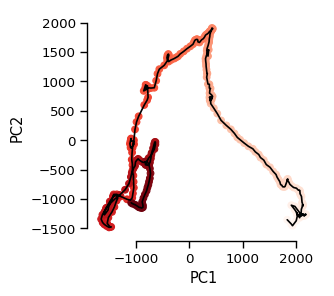

In [665]:
vis_pca_trajectory(x);

In [ ]:
sns.set_context('paper', font_scale=1.1)
fig, ax = plt.subplots(1,1,figsize = (20,5))

with sns.axes_style("ticks"):
    for 

(301, 10239)

In [671]:
y[::5,].shape

(61, 10239)

In [704]:
yf = butter_temporal_filter(y, 3, 30, 2)
yfs = yf[::5,]

cy = compute_curvature(y)
cyf = compute_curvature(yf)
cyfs = compute_curvature(yfs)

print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(cy.mean(), cyf.mean(), cyfs.mean()))
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(np.median(cy), np.median(cyf), np.median(cyfs)))

Original: 38.214, Filtered: 22.879, Subsampled Curvature: 94.924
Original: 38.071, Filtered: 22.684, Subsampled Curvature: 94.944


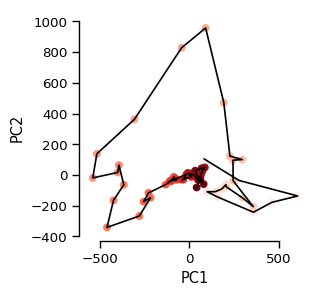

In [705]:
vis_pca_trajectory(yfs);

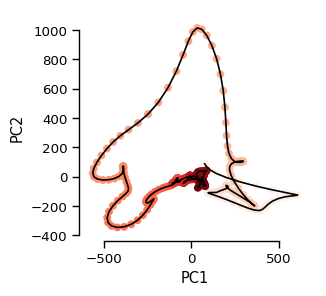

In [706]:
vis_pca_trajectory(yf);

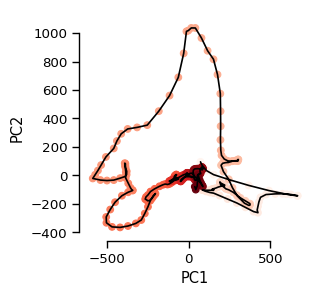

In [707]:
vis_pca_trajectory(y);

In [945]:
N = 10000
x1 = np.random.randn(1,N) +2
x2 = np.random.randn(1,N) +3
x3 = np.random.randn(1,N) + 1

X = np.vstack([x1, x2, x3])
compute_curvature(X)

array([135.25740503])

In [942]:
np.cos(np.radians(120))

-0.4999999999999998

In [947]:
np.cos(np.pi/2)

6.123233995736766e-17

In [938]:
np.radians(120)

2.0943951023931953

In [919]:
r = np.random.randn(301,100000)
rf = temporal_filter(r, 3, 30, 2)
rfs = rf[::5, ]

cr = compute_curvature(r)
crf = compute_curvature(rf)

crfs = compute_curvature(rfs)
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(cr.mean(), crf.mean(), crfs.mean()))
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(np.median(cr), np.median(crf), np.median(crfs)))

Original: 120.010, Filtered: 31.960, Subsampled Curvature: 112.638
Original: 120.011, Filtered: 32.138, Subsampled Curvature: 112.697


In [1010]:
r = np.random.randint(0, 10, size=(301,10000))
rf = temporal_filter(r, 3, 30, 2)
rfs = rf[::5, ]

cr = compute_curvature(r)
crf = compute_curvature(rf)

crfs = compute_curvature(rfs)
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(cr.mean(), crf.mean(), crfs.mean()))
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(np.median(cr), np.median(crf), np.median(crfs)))

Original: 119.989, Filtered: 31.953, Subsampled Curvature: 112.635
Original: 119.999, Filtered: 32.120, Subsampled Curvature: 112.681


In [1012]:
r   = np.random.randn(301,2)
rf  = temporal_filter(r, 3, 30, 2)
rfs = rf[::5, ]

cr = compute_curvature(r)
crf = compute_curvature(rf)

crfs = compute_curvature(rfs)
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(cr.mean(), crf.mean(), crfs.mean()))
print('Original: {:.3f}, Filtered: {:.3f}, Subsampled Curvature: {:.3f}'.format(np.median(cr), np.median(crf), np.median(crfs)))

Original: 119.124, Filtered: 30.509, Subsampled Curvature: 112.332
Original: 129.286, Filtered: 20.629, Subsampled Curvature: 120.113


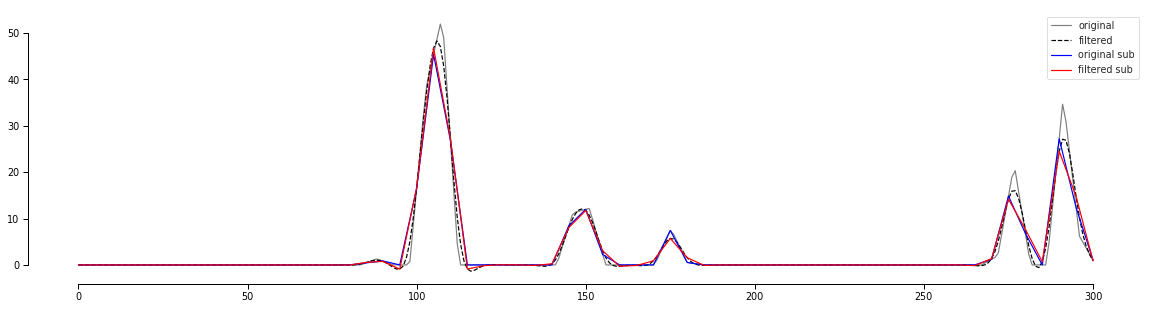

In [880]:
neu = 8429
y = dataset[ind].responses
yf = butter_temporal_filter(y, 3, 30, 2)

sns.set_context('paper', font_scale=1.1)
fig, ax = plt.subplots(1,1,figsize = (20,5))

with sns.axes_style("ticks"):

    plt.plot(np.arange(301), y[:, neu], 'gray', label = 'original')
    plt.plot(np.arange(301), yf[:, neu], 'k--', label = 'filtered')
    plt.plot(np.arange(301)[::5,], y[::5, neu], 'b', label='original sub')
    plt.plot(np.arange(301)[::5,], yf[::5, neu], 'r', label='filtered sub')
    plt.legend()
sns.despine(trim=True)

### Neural responses

In [437]:
indsv1 = dataset.neurons.area == 'V1'
y = dataset[0].responses[:, indsv1]

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [438]:
yf = temporal_filter(y, 3, 30, 2)
yf = yf[0:, ]

In [439]:
#xf = xf[::5,]
#yf = yf[::5,]

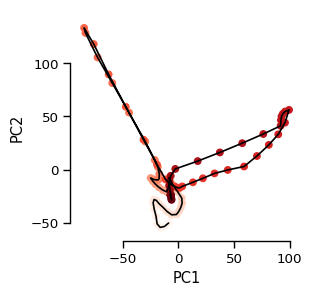

In [440]:
fig, yr = vis_pca_trajectory(y);

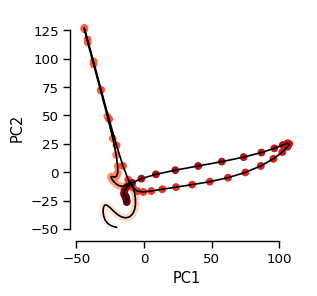

In [441]:
fig, yrf = vis_pca_trajectory(yf);

In [435]:
compute_curvature(xf).mean()

81.65762796531156

In [436]:
compute_curvature(yf).mean()

91.28042038292271

In [444]:
x[:,::1,::1].shape

(91, 72, 128)

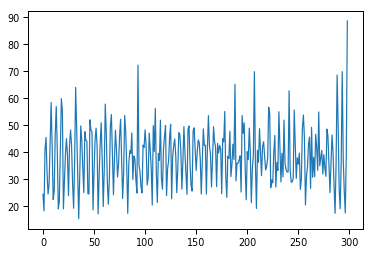

In [634]:
plt.plot(compute_curvature(y))

In [640]:
compute_curvature(yf).mean()

22.878882409517594

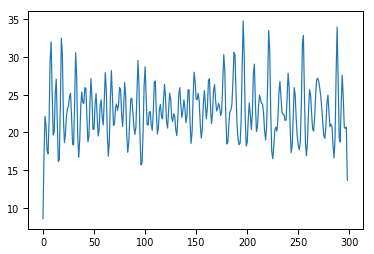

In [635]:
plt.plot(compute_curvature(yf))

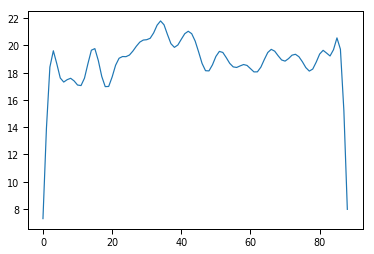

In [333]:
plt.plot(compute_curvature(xf))

### Control with straight stimuli (interpolation between frames)

In [617]:
alpha = np.arange(0,1,1/301)

In [620]:
x0 = x[0,]
x1 = x[200,]

In [621]:
#plt.imshow(x0, cmap = 'gray')

In [627]:
a_x = np.array([a*x1 + (1-a)*x0 for a in alpha])

In [629]:
a_xf = butter_temporal_filter(a_x, 3, 30, 2)

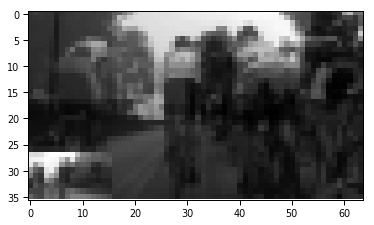

In [623]:
plt.imshow(a_x[70,], cmap = 'gray')

In [630]:
a_c = compute_curvature(a_x)
a_cf = compute_curvature(a_xf)

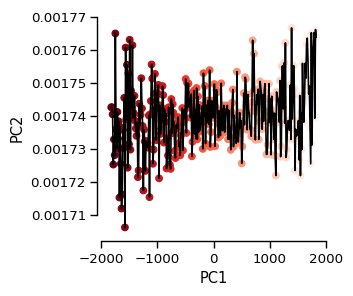

In [631]:
vis_pca_trajectory(a_x);

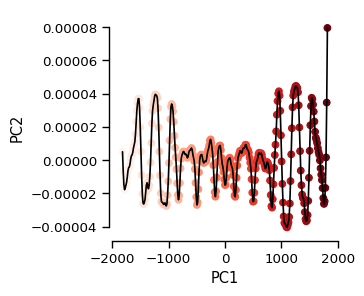

In [632]:
vis_pca_trajectory(a_xf);

In [626]:
a_c.mean()

0.016135834728709757

In [633]:
a_cf.mean()

6.18572676836131e-05

In [481]:
a_cd = consecutive_difference(a_x)
a_nm = normalize_movie(a_cd)
a_c  = curvature(a_nm)

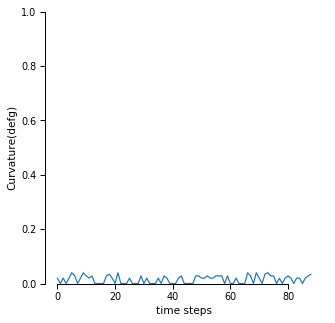

In [482]:
sns.set_context('paper', font_scale=1.1)
fig, ax = plt.subplots(1,1,figsize = (5,5))
with sns.axes_style("ticks"):
    ax.plot(a_c)

ax.set_ylim([0,1])
ax.set_ylabel('Curvature(defg)')
ax.set_xlabel('time steps')
sns.despine(trim=True)

In [483]:
a_pca = PCA(n_components=2)

In [484]:
T = a_x.shape[0]
aX = a_x.reshape(T,-1)
a_pca.fit(aX)
print(a_pca.explained_variance_ratio_)
print(sum(a_pca.explained_variance_ratio_))
aXred = a_pca.transform(aX)

[1.000000e+00 9.515363e-13]
1.0000000000009515


(-20, 700)

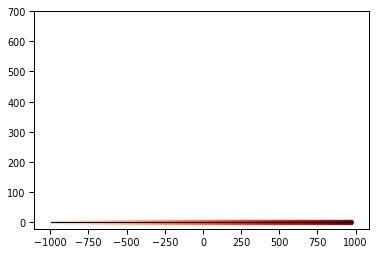

In [485]:
L =90
plt.plot(aXred[:L,0], aXred[:L,1], 'k-')
plt.scatter(aXred[:L,0], aXred[:L,1], c = np.arange(L), cmap=plt.cm.Reds, alpha =1)
plt.ylim([-20,700])
#plt.xlim([-300, -50])

## Straightning neural responses

#### convert responses into a pandas data frame

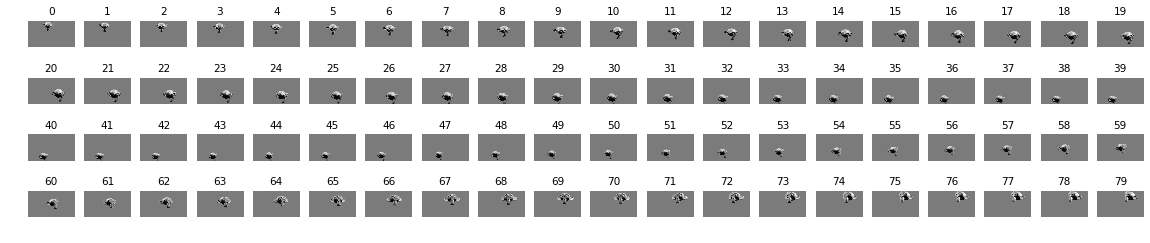

In [472]:
fig, axes = plt.subplots(4,20, figsize=(20,4))
inputs = dataset[ix].inputs[0]
vmin = inputs.min()
vmax = inputs.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(inputs[i], cmap = 'gray', vmax = vmax, vmin = vmin)
    ax.axis('off')
    ax.set_title(i)

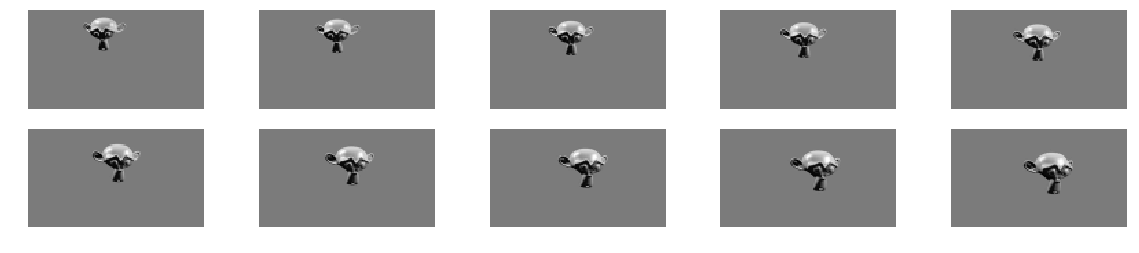

In [473]:
fig, axes = plt.subplots(2,5, figsize=(20,4))
inputs = dataset[ix].inputs[0]
vmin = inputs.min()
vmax = inputs.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(inputs[i], cmap = 'gray', vmax = vmax, vmin = vmin)
    ax.axis('off')

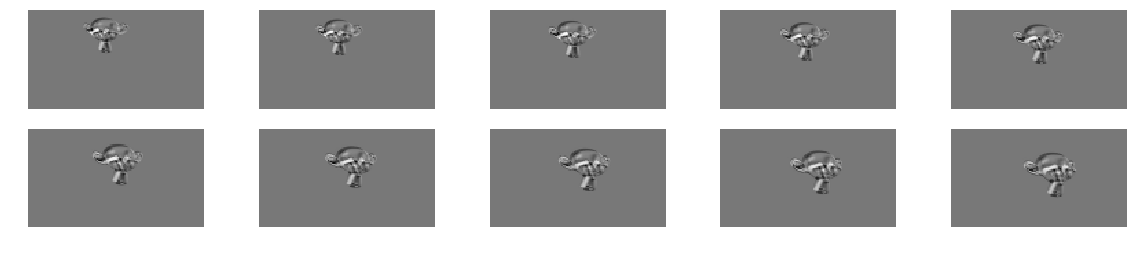

In [474]:
fig, axes = plt.subplots(2,5, figsize=(20,4))
vmin = cd.min()
vmax = cd.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(cd[i], cmap = 'gray', vmax =vmax, vmin=vmin)
    ax.axis('off')

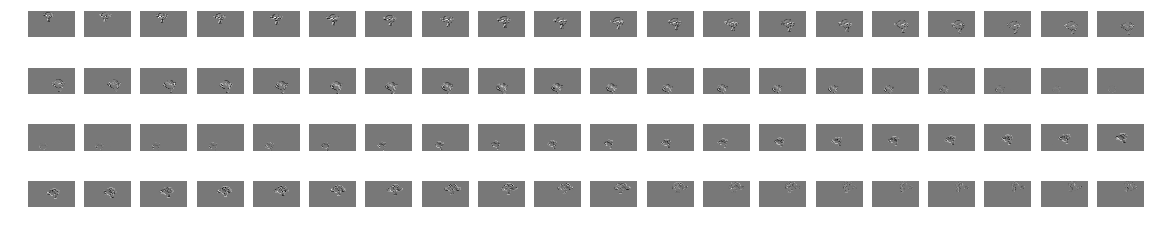

In [475]:
fig, axes = plt.subplots(4,20, figsize=(20,4))
vmin = cd.min()
vmax = cd.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(cd[i], cmap = 'gray', vmax =vmax, vmin=vmin)
    ax.axis('off')

(array([5.80000e+01, 4.27000e+02, 1.55000e+03, 5.39700e+03, 1.97857e+05,
        1.45400e+03, 4.75000e+02, 1.13000e+02, 2.50000e+01, 4.00000e+00]),
 array([-144.74382  , -108.89129  ,  -73.03876  ,  -37.186226 ,
          -1.3336945,   34.518837 ,   70.37137  ,  106.2239   ,
         142.07643  ,  177.92896  ,  213.7815   ], dtype=float32),
 <a list of 10 Patch objects>)

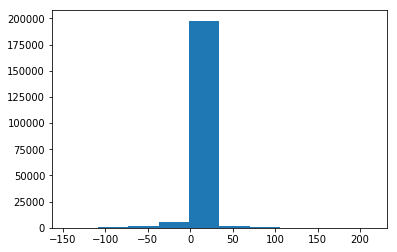

In [245]:
plt.hist(cd.flatten())

In [619]:
np.unique(dataset.neurons.area)

array(['AL', 'LI', 'LLA', 'LM', 'P', 'POR', 'RL', 'V1', 'unknown'],
      dtype='<U7')

In [647]:
area_inds = dataset.neurons.area =="P"

x = np.array([dataset[i].responses[:,area_inds] for i in np.where(inds)[0]])
#x = np.mean(x, 0)

In [648]:
x.shape

(21, 91, 426)

In [649]:
c = []
for x_ in x:
    cd = consecutive_difference(x_)
    nm = normalize_movie(cd)
    c.append(curvature(nm))

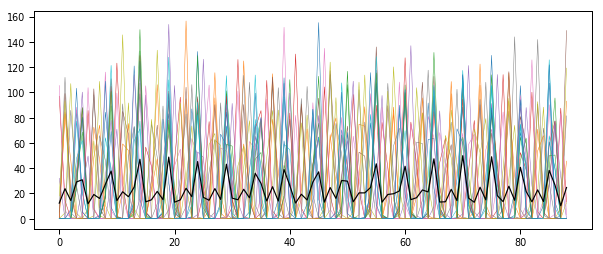

In [650]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
for c_ in c:
    ax.plot(c_,linewidth= 0.5)
ax.plot(np.mean(c, 0), 'k')

In [651]:
print(np.mean(c))

22.93427180474477


(array([2., 1., 5., 2., 3., 4., 1., 0., 0., 3.]),
 array([24.44764874, 24.80030397, 25.1529592 , 25.50561443, 25.85826965,
        26.21092488, 26.56358011, 26.91623533, 27.26889056, 27.62154579,
        27.97420102]),
 <a list of 10 Patch objects>)

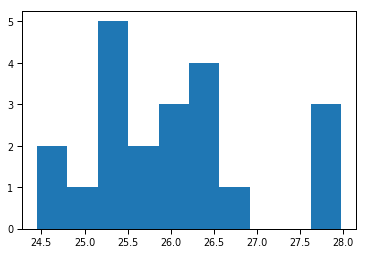

In [646]:
plt.hist(np.mean(c, 1))

33.53178


In [81]:
dataset[0].inputs[0][1:,].shape

(90, 36, 64)

In [82]:
dataset[0].inputs[0][:-1,].shape

(90, 36, 64)

In [85]:
dataset[0].responses.shape

(91, 5208)

In [86]:
a = np.random.randn(10,5)
b = np.random.randn(10,5)

In [206]:
np.dot(a,b.T).shape

(10, 10)

In [118]:
np.arccos([1,0,0.5,-1])

array([0.        , 1.57079633, 1.04719755, 3.14159265])

In [107]:
A = np.random.randn(10,10)

In [117]:
np.cos(np.pi)

-1.0

In [109]:
np.diag(A)

array([-0.82869617, -0.3825747 ,  0.40856639,  0.58961943,  1.04730449,
       -1.16151532, -0.59407206, -0.30394277, -0.28041586,  0.74045648])

In [209]:
np.degrees(np.arccos(-1))

180.0

In [685]:
sum(dataset.condition_hashes == 'nhWYVibwvIA9Pb5L2/AX')

1

In [686]:
ind_num = np.where(dataset.condition_hashes == 'nhWYVibwvIA9Pb5L2/AX')[0][0]

In [687]:
ind_num

1067

In [695]:
dataset.tiers[ind_num]

'train'

In [688]:
dataset[ind_num].inputs.shape

(1, 91, 72, 128)

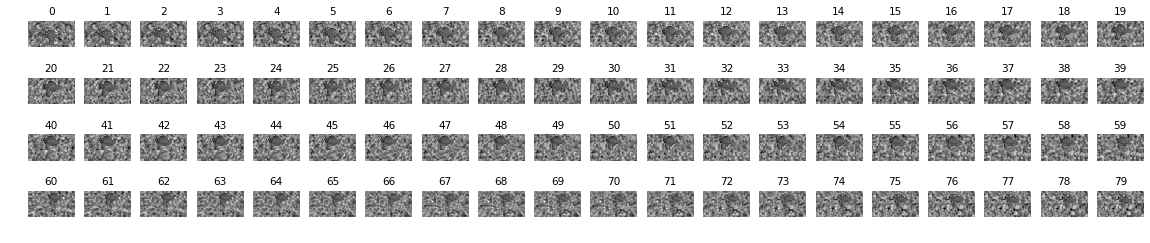

In [696]:
fig, axes = plt.subplots(4,20, figsize=(20,4))
inputs = dataset[ind_num].inputs[0]
vmin = inputs.min()
vmax = inputs.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(inputs[i], cmap = 'gray', vmax = vmax, vmin = vmin)
    ax.axis('off')
    ax.set_title(i)

IndexError: index 91 is out of bounds for axis 0 with size 91

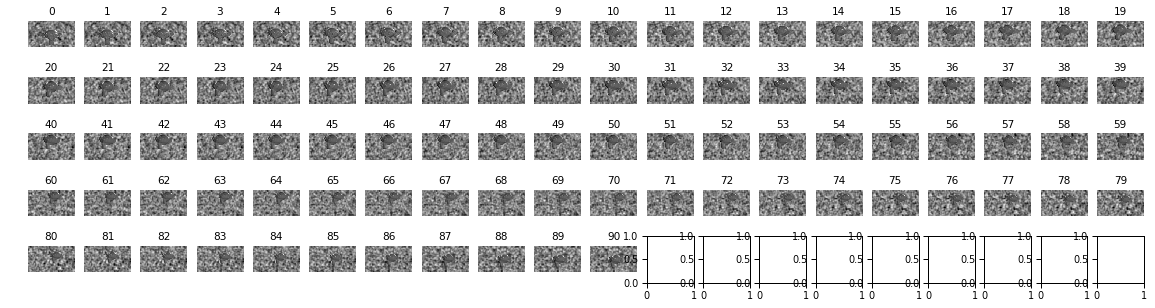

In [691]:
fig, axes = plt.subplots(4,20, figsize=(20,5))
inputs = dataset[ind_num].inputs[0]
vmin = inputs.min()
vmax = inputs.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(inputs[i], cmap = 'gray', vmax = vmax, vmin = vmin)
    ax.axis('off')
    ax.set_title(i)

In [48]:
kimages.shape

(24076, 233, 233)

In [19]:
import pickle


In [20]:
with open('/gpfs01/bethge/share/csrf_data/sessions/V1_session_1_3638373332053.pickle', 'rb') as h:
    kdata = pickle.load(h)

In [46]:
import pickle
with open('/gpfs01/bethge/share/csrf_data/images/imageSet1_35ppd.pickle', 'rb') as h:
    kimages = pickle.load(h)

In [43]:
import pickle
with open('/gpfs01/bethge/share/csrf_data/csrf_dataset_one_35ppd.pickle', 'rb') as h:
    kimages = pickle.load(h)

In [22]:
kdata['testing_responses'].shape

(10, 12, 2910)

In [27]:
len(kdata['training_image_ids'])

12120

In [8]:
len(kdata['training_image_ids'])

12120

In [9]:
len(kdata['testing_image_ids'])

2910

In [11]:
for k in kdata:
    print(k)

subject_id
session_id
training_image_ids
training_prior_image_ids
training_responses
testing_image_ids
testing_prior_image_ids
testing_responses
testing_repetitions
unit_indices


In [20]:
len(kdata['testing_image_ids'])

2910

In [22]:
sum(kdata['testing_image_ids'] == 12088)

40

In [23]:
kdata['training_responses'].shape

(10, 12, 12120)

In [30]:
np.unique(kdata['testing_image_ids'])

array([  177,   208,   866,   898,  1149,  1262,  1483,  1695,  1774,
        2605,  3035,  3126,  3415,  3649,  3774,  3912,  3926,  4078,
        4254,  4515,  4958,  5047,  5095,  5118,  5235,  5386,  5433,
        5456,  5802,  6418,  6860,  9003,  9256,  9460,  9558,  9683,
       10744, 11346, 11649, 11713, 12088, 12668, 13154, 13379, 13399,
       13794, 13816, 14530, 14534, 14613, 15878, 16587, 16706, 17182,
       18110, 18586, 18966, 19600, 19934, 21540, 21617, 22329, 22526,
       22748, 22843, 22958, 23127, 23290, 23320, 23596, 23597, 23765,
       23872, 24012, 24051], dtype=uint16)

In [28]:
sum(kdata['testing_image_ids'] == 177)

40

In [24]:
kdata['testing_image_ids'].shape

(2910,)

In [15]:
kdata['testing_responses'].shape

(10, 12, 2910)

In [17]:
kdata['testing_repetitions']

array([39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40], dtype=uint8)

In [33]:
kdata['testing_image_ids']

array([12088, 23320, 14613, ...,  9683,  6860,  3774], dtype=uint16)

In [5]:
dataset[0].inputs[0].shape

(91, 72, 128)

### visualizing a few movies

In [40]:
x = dataset[0].inputs[0,]

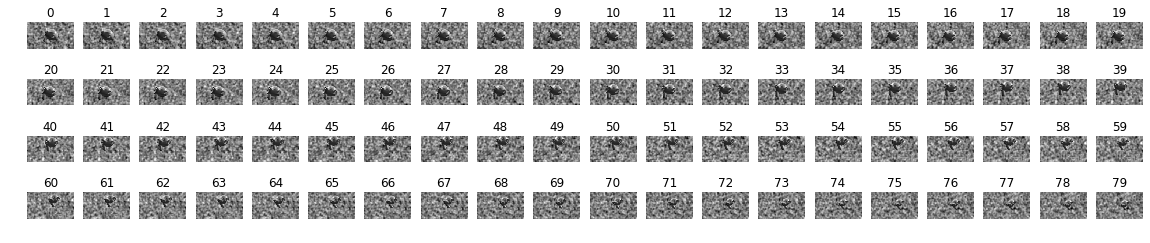

In [41]:
fig, axes = plt.subplots(4,20, figsize=(20,4))
#inputs = dataset[ind_num].inputs[0]
vmin = x.min()
vmax = x.max()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x[i], cmap = 'gray', vmax = vmax, vmin = vmin)
    ax.axis('off')
    ax.set_title(i)